## Описание
[ссылка на конкурс](https://official.contest.yandex.ru/contest/10569/problems/)

    For the team fen11x they are as follows.
    Login: IDAO2019Team1240
    Password: TapjgmR642


## Планы
- Запустить baseline
- Отправить commit
- Посмотреть на важные признаки
- Настроить валидацию на сервере


[должно занять не более 6 часов]
- Набросать список идей, план действий

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
%%time
df = pd.read_csv('../data/train_v2_merged.csv')

CPU times: user 1min 24s, sys: 6.1 s, total: 1min 30s
Wall time: 1min 30s


In [11]:
df.keys()

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

In [42]:
df[['label', 'particle_type']]

,label,particle_type
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,2
7,1,1
8,1,1
9,1,1


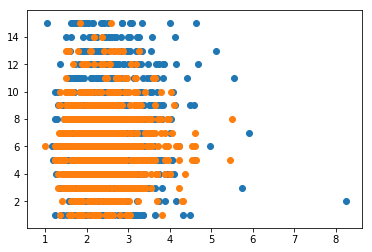

In [41]:
# df['MatchedHit_DX[3]'].hist(alpha = 0.5)
# df['MatchedHit_X[3]'].hist(alpha = 0.5)

# temp = df[:1]
plt.scatter(df[df['label']==0]['avg_cs[0]'][:1000].get_values(), df[df['label']==0]['MatchedHit_T[0]'][:1000].get_values())
plt.scatter(df[df['label']==1]['avg_cs[0]'][:1000].get_values(), df[df['label']==1]['MatchedHit_T[0]'][:1000].get_values())
plt.show()

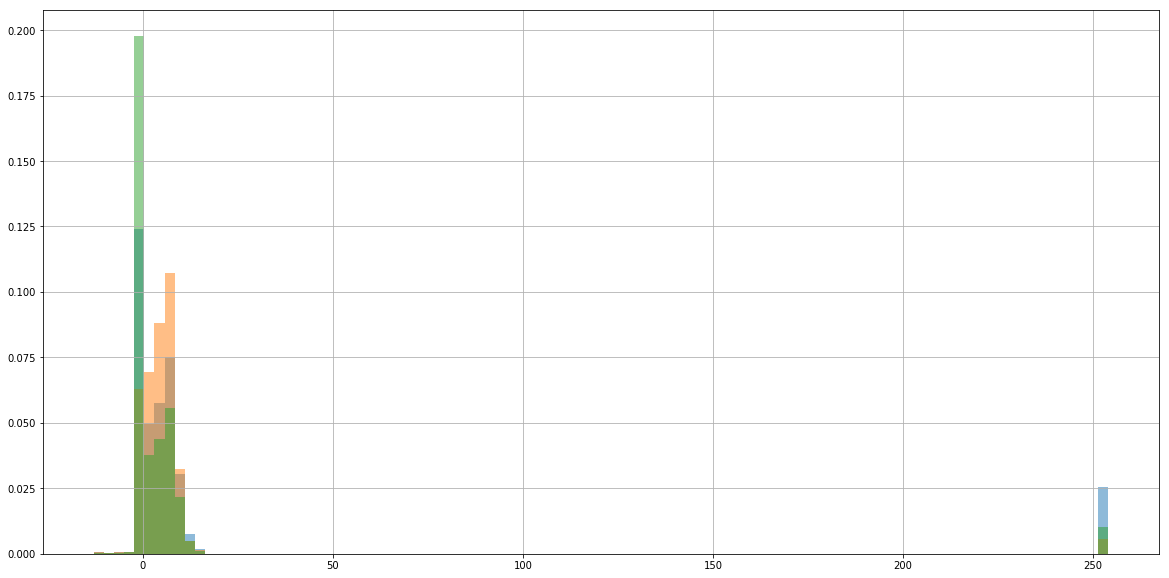

In [23]:
plt.figure(figsize = (20, 10))
(df['MatchedHit_T[3]']-df['MatchedHit_DT[3]'].abs())[df['particle_type'] == 0].hist(bins = 100, alpha = 0.5, normed = True)
(df['MatchedHit_T[3]']-df['MatchedHit_DT[3]'].abs())[df['particle_type'] == 1].hist(bins = 100, alpha = 0.5, normed = True)
(df['MatchedHit_T[3]']-df['MatchedHit_DT[3]'].abs())[df['particle_type'] == 2].hist(bins = 100, alpha = 0.5, normed = True)
plt.show()

In [10]:
df['MatchedHit_T[0]']+df['MatchedHit_T[1]']+df['MatchedHit_T[2]']+df['MatchedHit_T[3]']

0           17
1           31
2           21
3           20
4           22
5           26
6           30
7           22
8           24
9           27
10          22
11         276
12          38
13          23
14          19
15          23
16          22
17          24
18          24
19          19
20          20
21          26
22          25
23         530
24          28
25          23
26          26
27          14
28          19
29          23
          ... 
5445675     30
5445676     24
5445677     33
5445678     28
5445679     18
5445680     23
5445681     19
5445682     24
5445683     21
5445684     40
5445685     25
5445686     23
5445687     31
5445688    279
5445689     29
5445690     23
5445691     16
5445692     16
5445693     19
5445694     15
5445695     28
5445696     33
5445697     24
5445698     20
5445699     32
5445700     21
5445701     26
5445702     21
5445703     15
5445704     29
Length: 5445705, dtype: int64

In [5]:
df['label'].value_counts()

1    5024487
0     421218
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


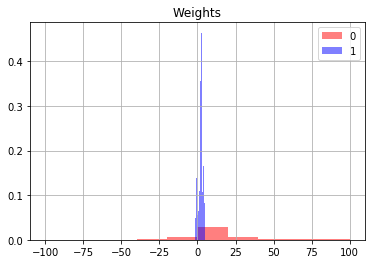

In [6]:
plt.title('Weights')
df[df['label'] == 0][df['weight'].abs()<1e2]['weight'].hist(color = 'red', alpha = 0.5, label='0', normed = True)
df[df['label'] == 1][df['weight'].abs()<1e2]['weight'].hist(color = 'blue', alpha = 0.5, label='1', normed = True)
plt.legend()
plt.show()

In [22]:
df.keys()

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

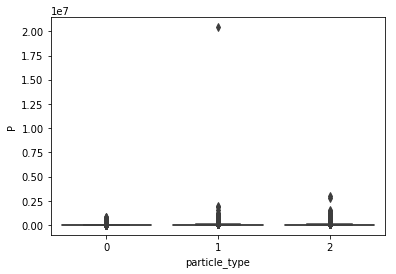

In [64]:
plt.figure
import seaborn as sns
sns.boxplot(y='P', x ='particle_type', data=df)
plt.show()

In [77]:
feat_norm = ['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
           'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
           'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
           'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
           'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
           'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
           'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
           'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
           'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
           'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
           'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
           'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
           'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
           'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
           'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]',
           'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 'Mextra_DX2[0]',
           'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]', 'Mextra_DY2[0]',
           'Mextra_DY2[1]', 'Mextra_DY2[2]', 'Mextra_DY2[3]', 'FOI_hits_N', 'PT',
           'P', 'label', 'weight']

strange_features = list(set(df.keys())-set(feat_norm))
print(strange_features)

['FOI_hits_DY', 'sWeight', 'FOI_hits_DT', 'FOI_hits_Y', 'FOI_hits_S', 'FOI_hits_DZ', 'FOI_hits_T', 'particle_type', 'FOI_hits_DX', 'kinWeight', 'id', 'FOI_hits_X', 'FOI_hits_Z']


In [78]:
list['[0 8 0 8 0]']

TypeError: 'type' object is not subscriptable

In [123]:
ind_0 = df[df['particle_type'] == 0].index[:1000]
ind_1 = df[df['particle_type'] == 1].index[:1000]
ind_2 = df[df['particle_type'] == 2].index[:1000]

In [125]:
object_features

['FOI_hits_DY',
 'FOI_hits_DT',
 'FOI_hits_Y',
 'FOI_hits_S',
 'FOI_hits_DZ',
 'FOI_hits_T',
 'FOI_hits_DX',
 'FOI_hits_X',
 'FOI_hits_Z']

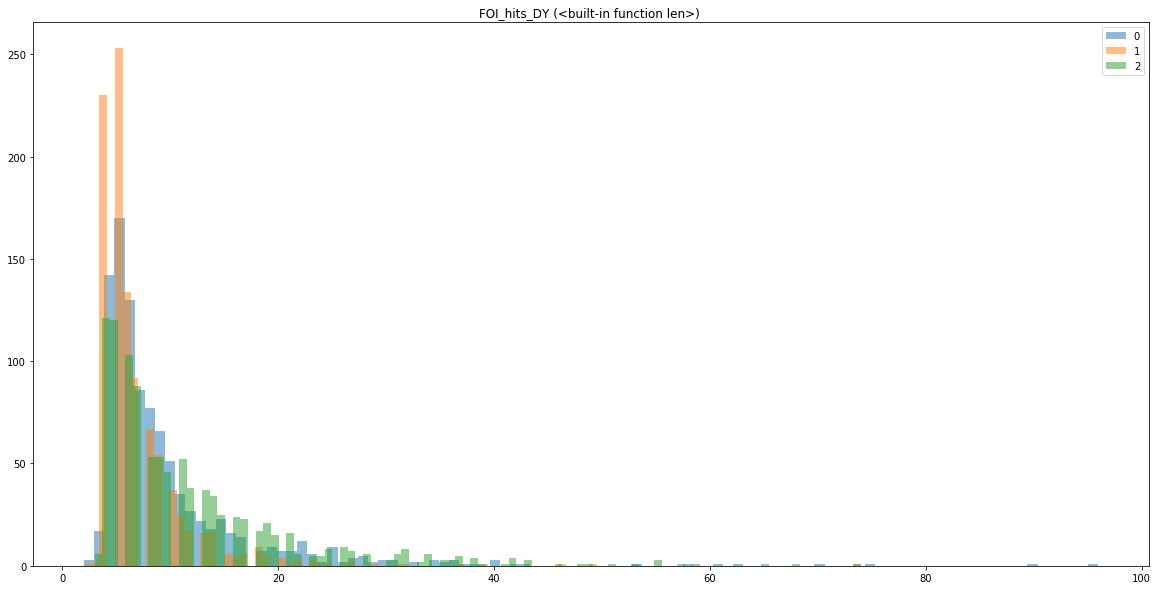

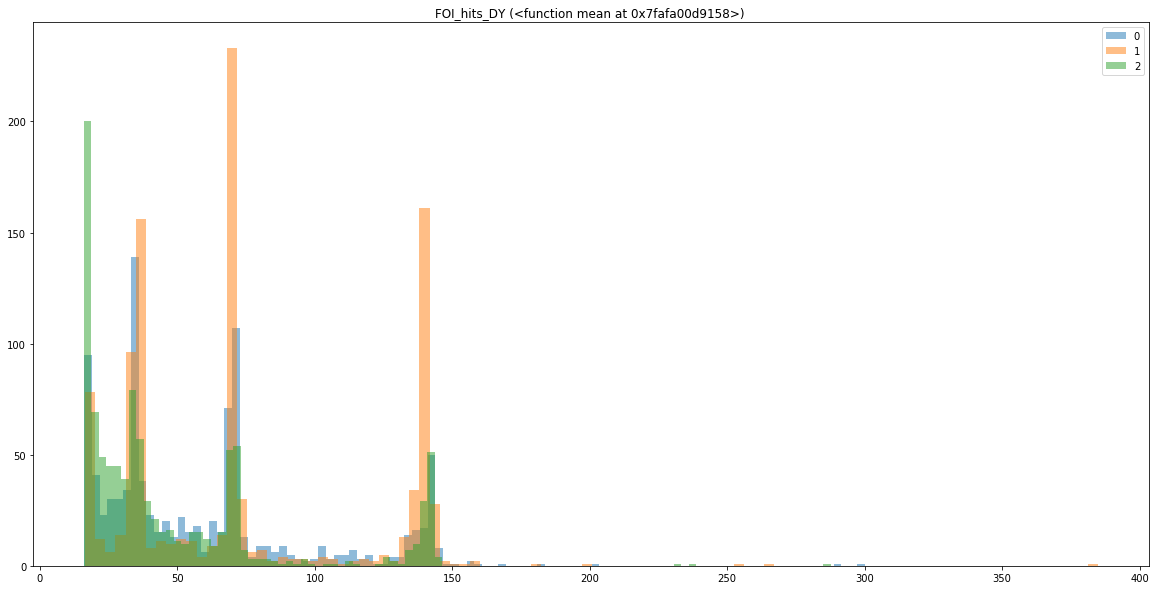

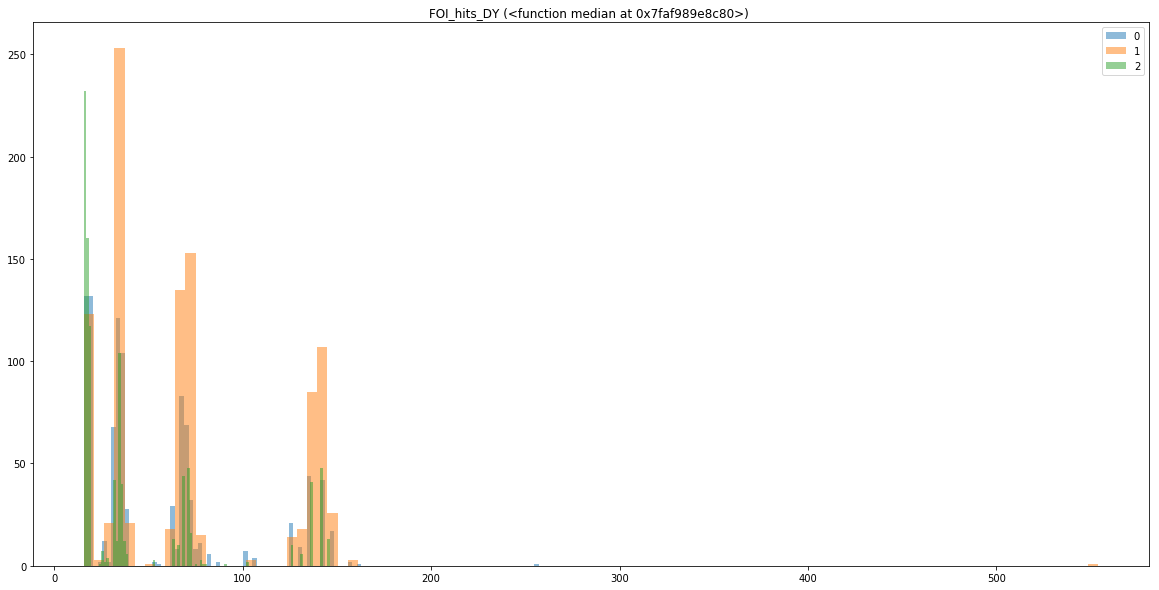

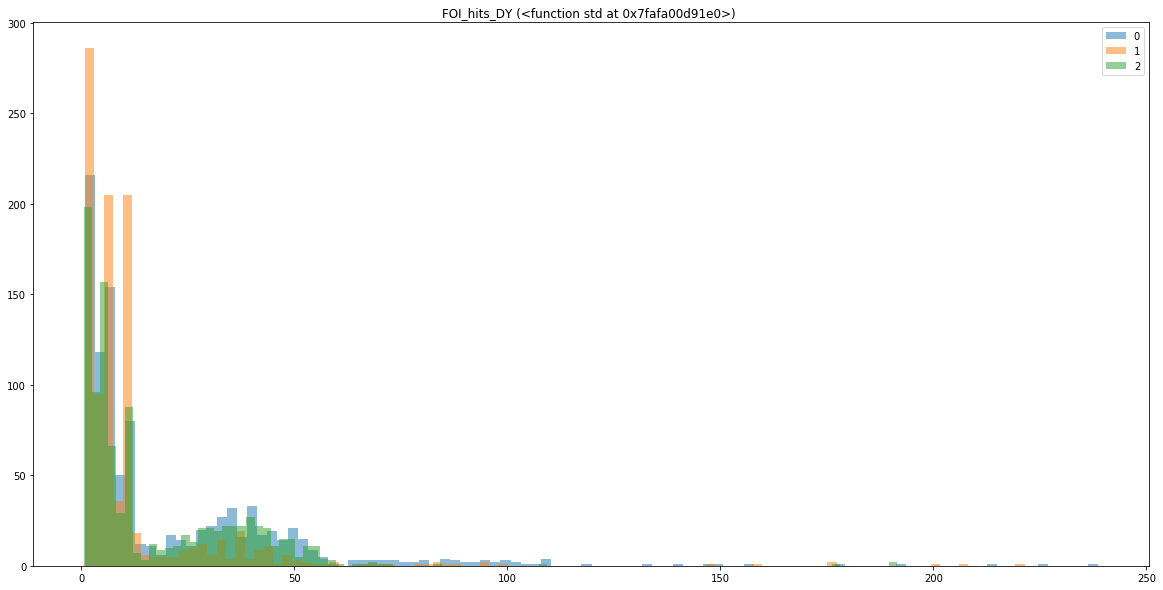

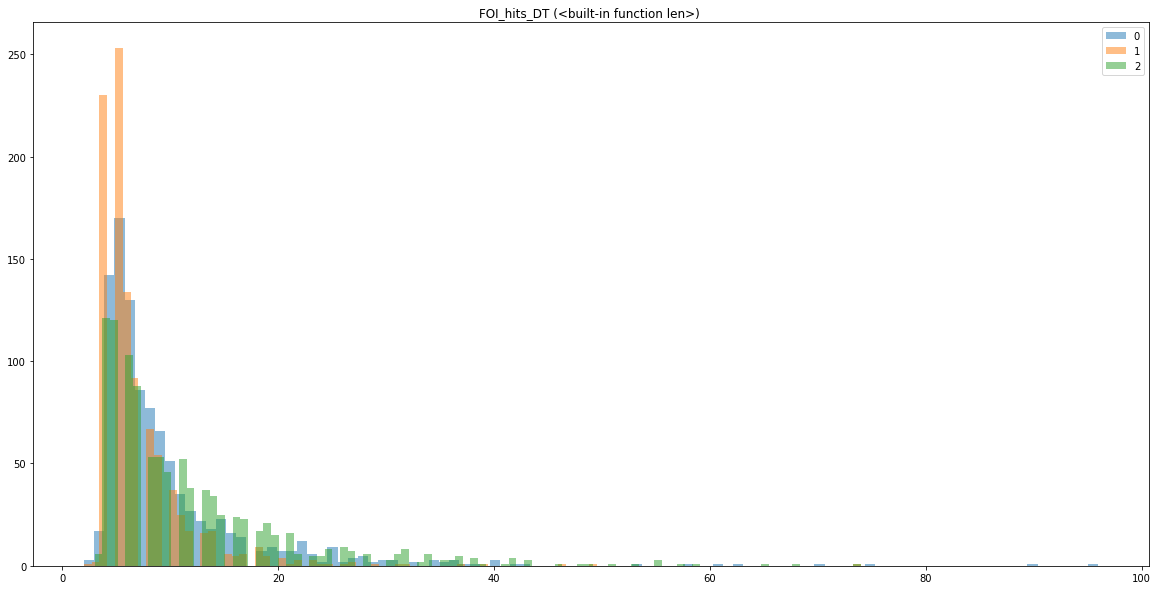

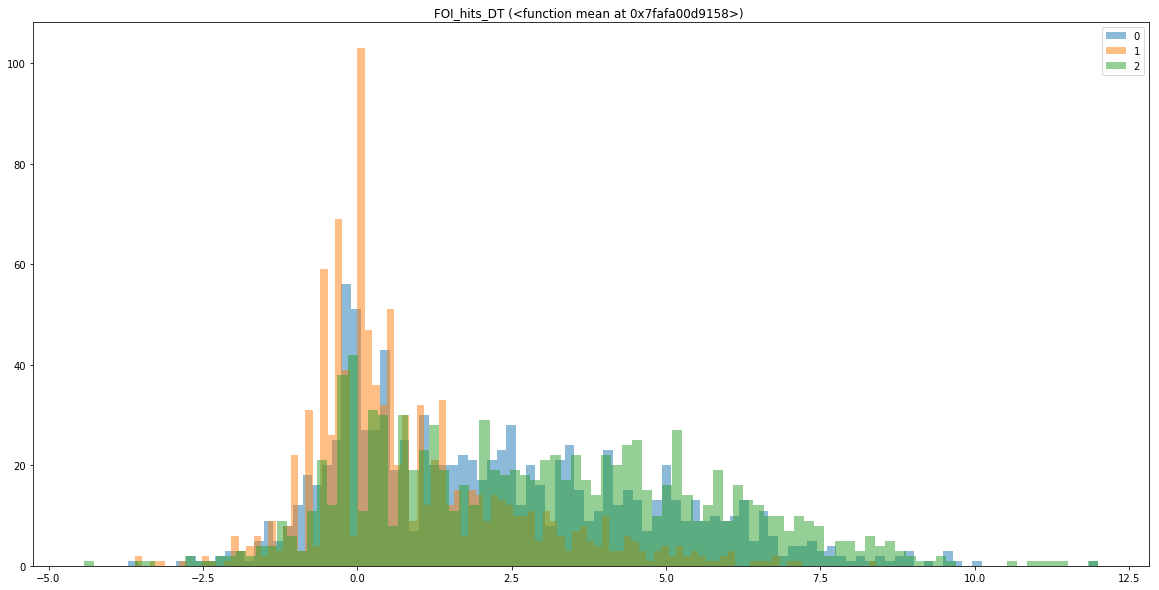

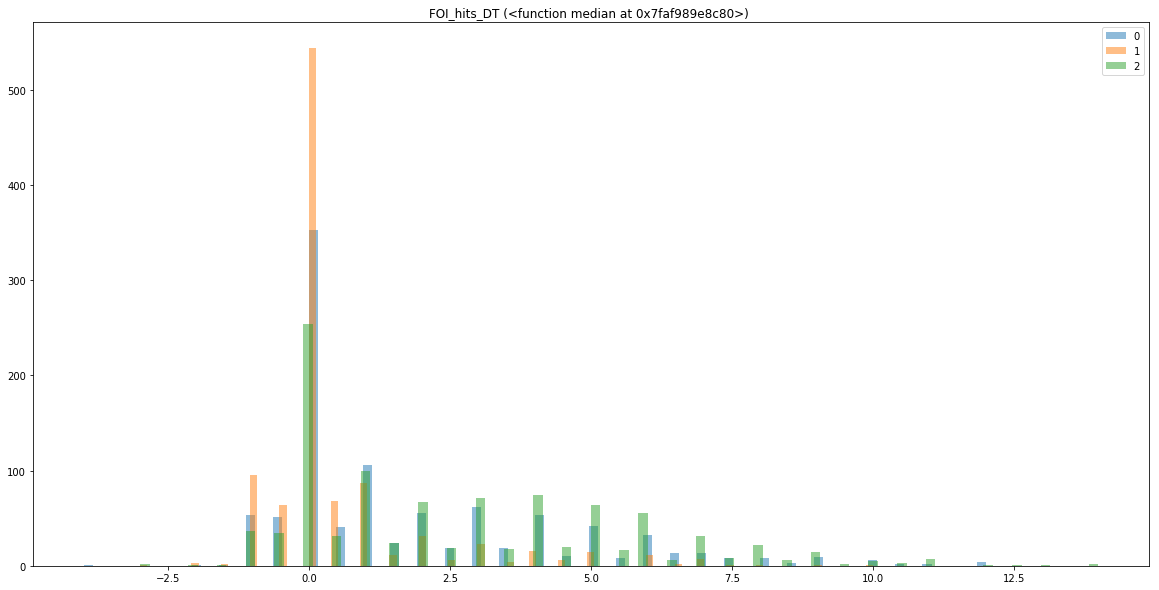

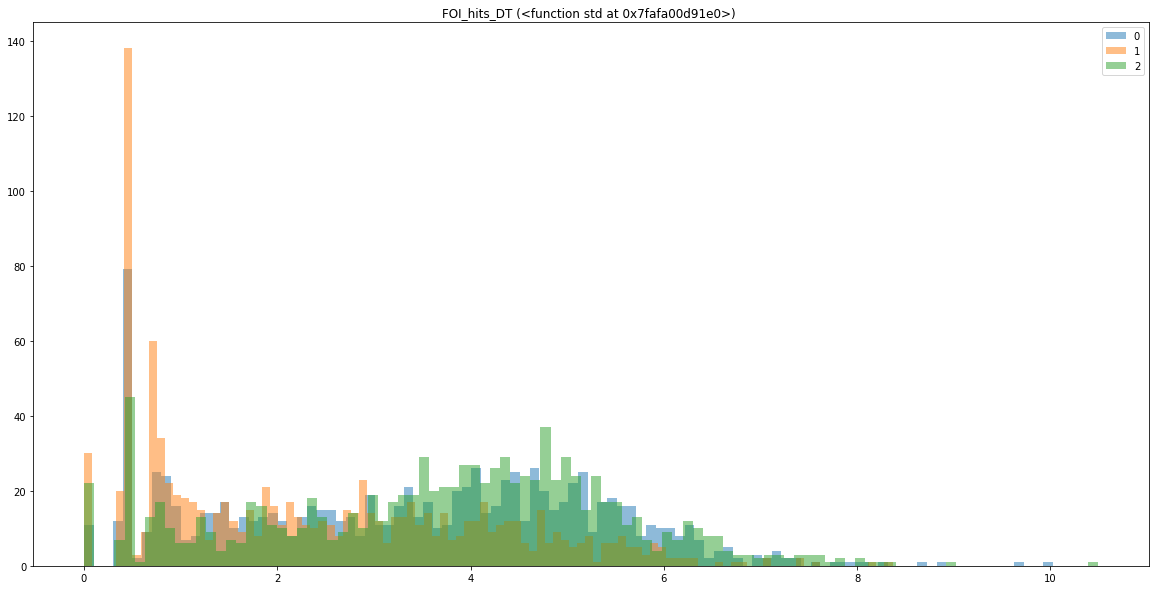

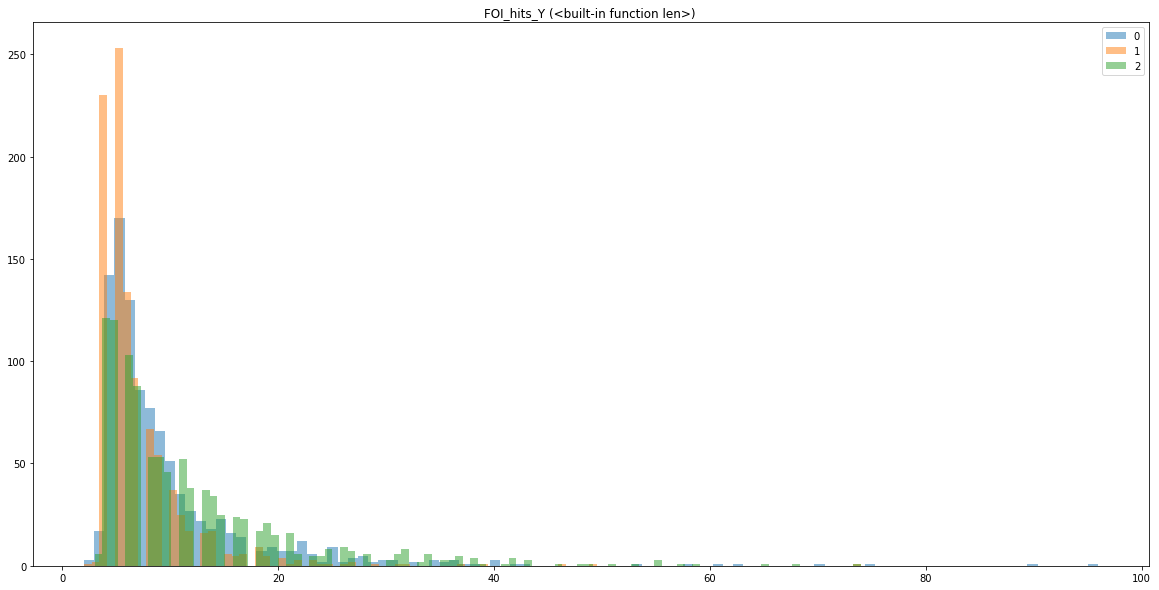

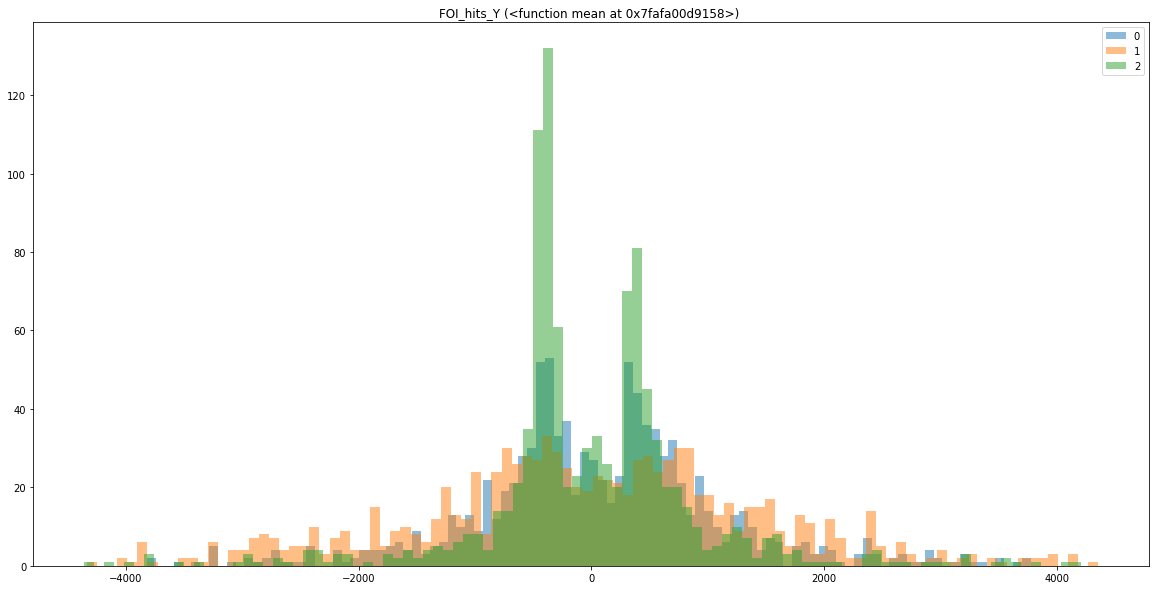

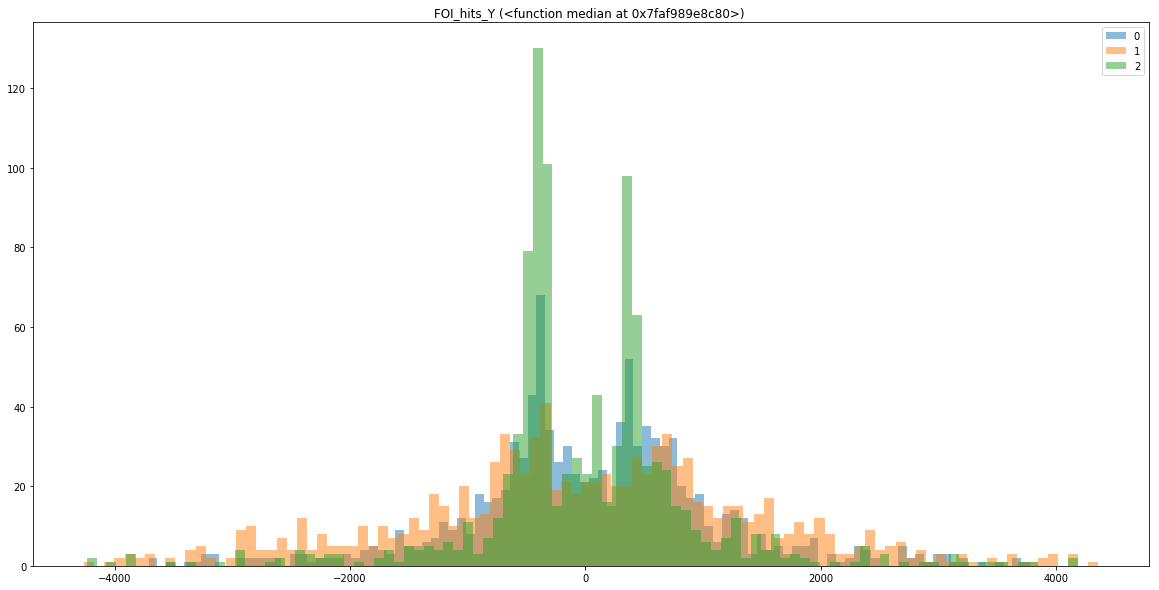

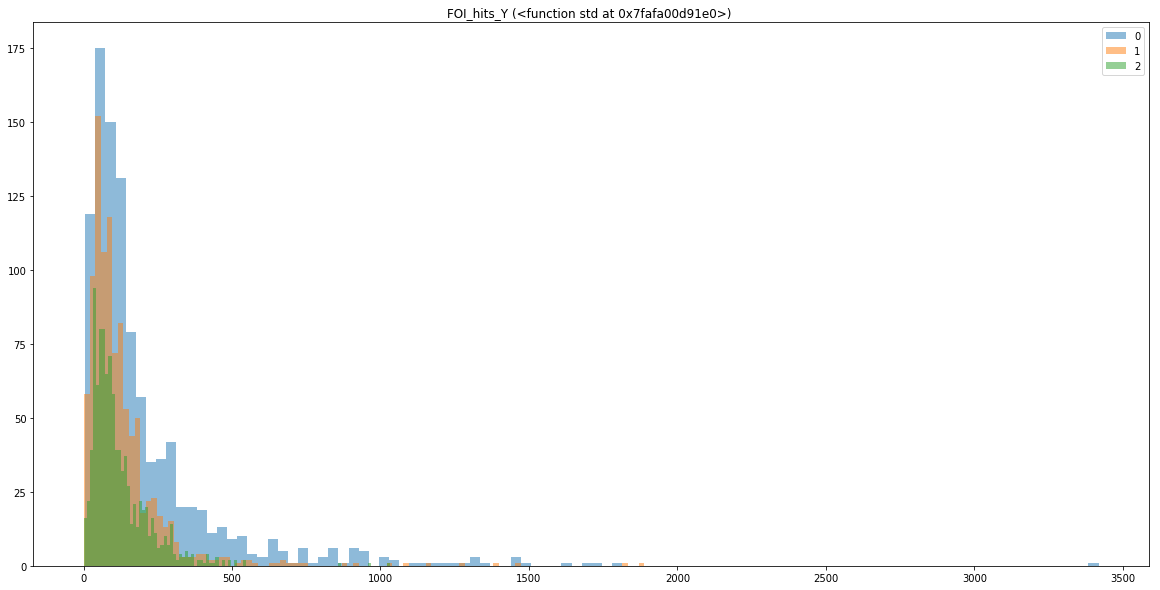

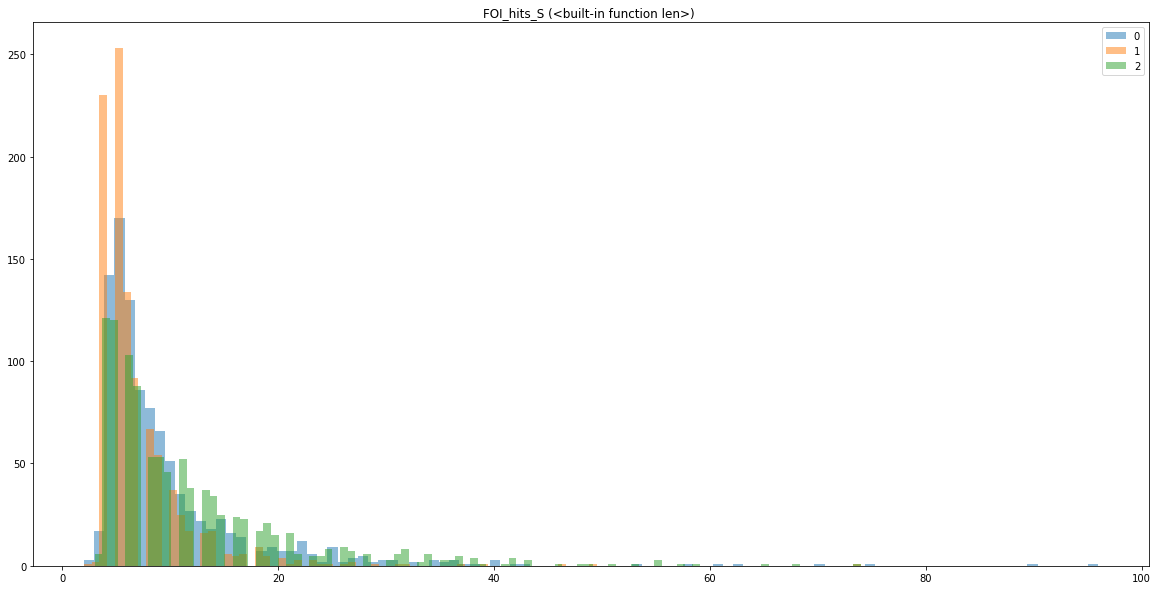

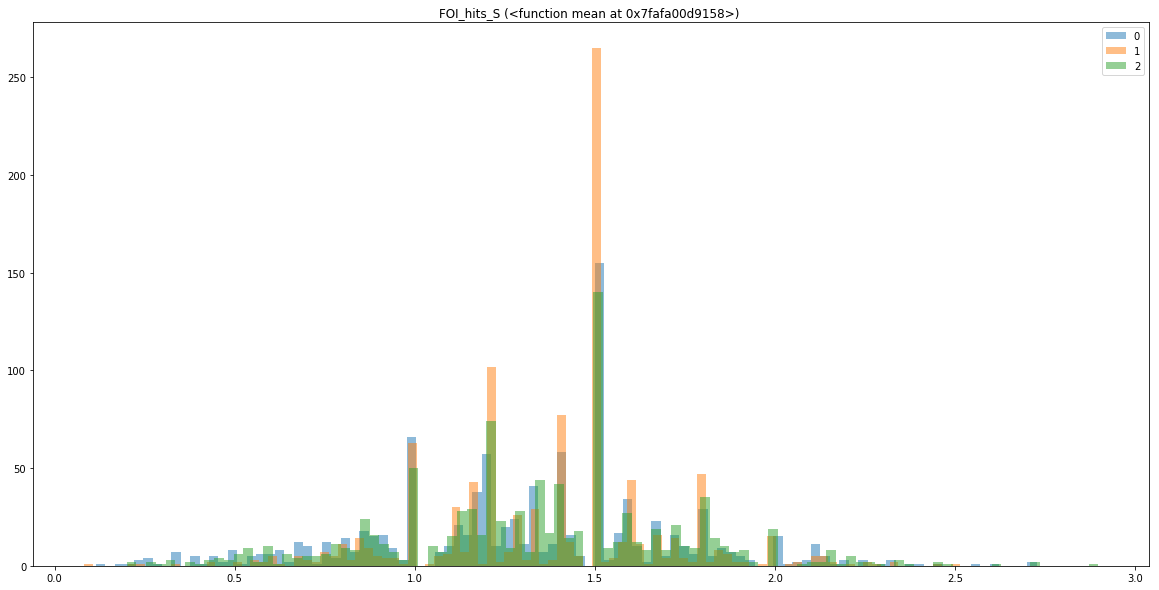

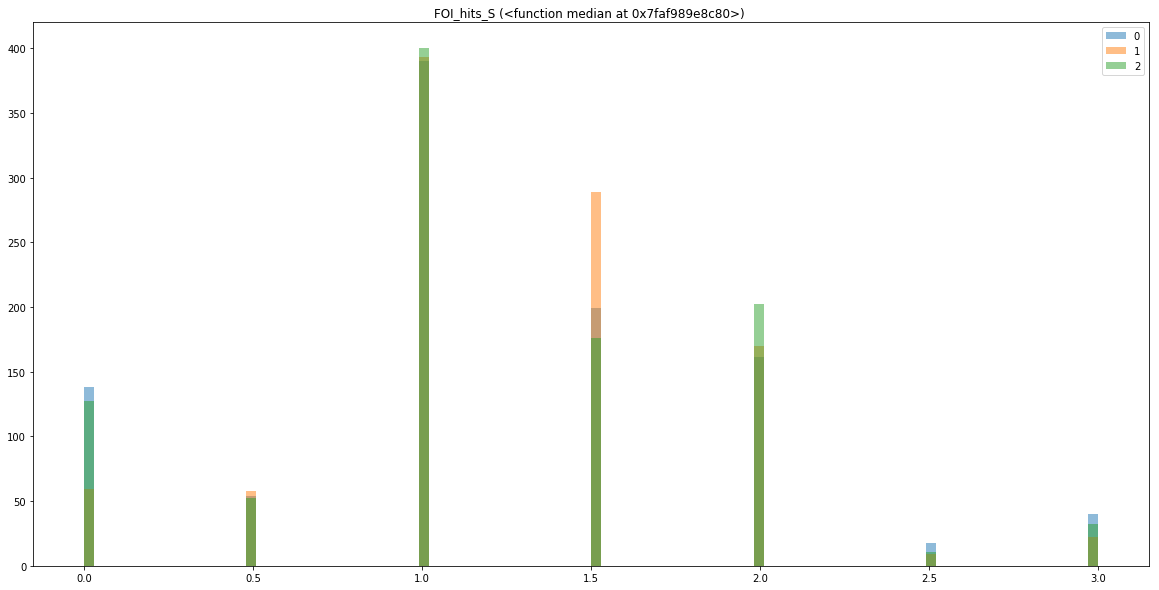

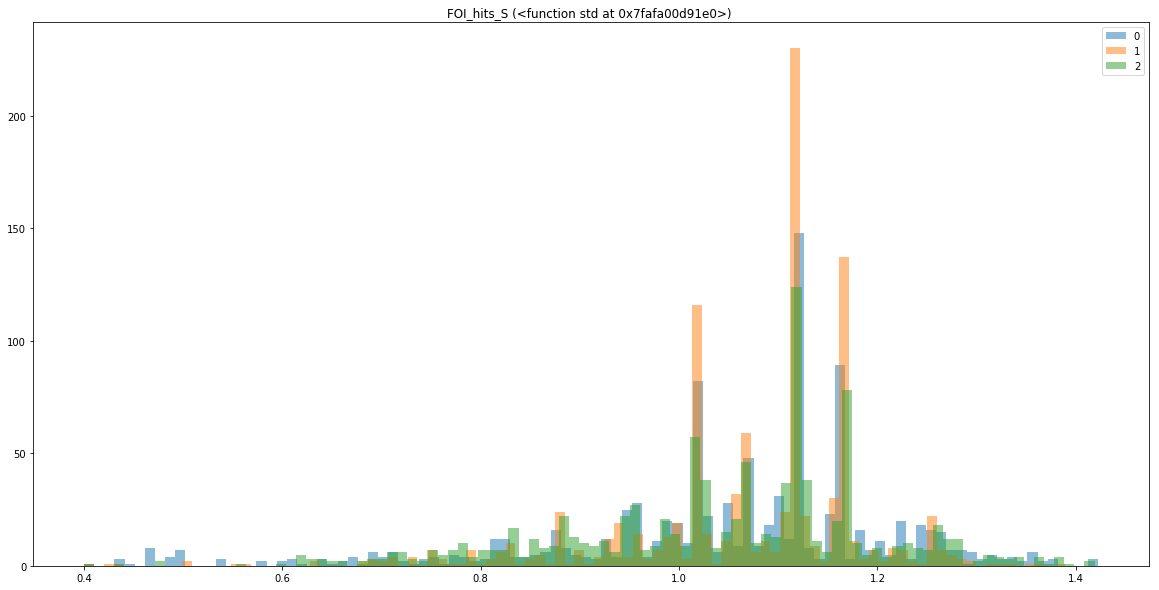

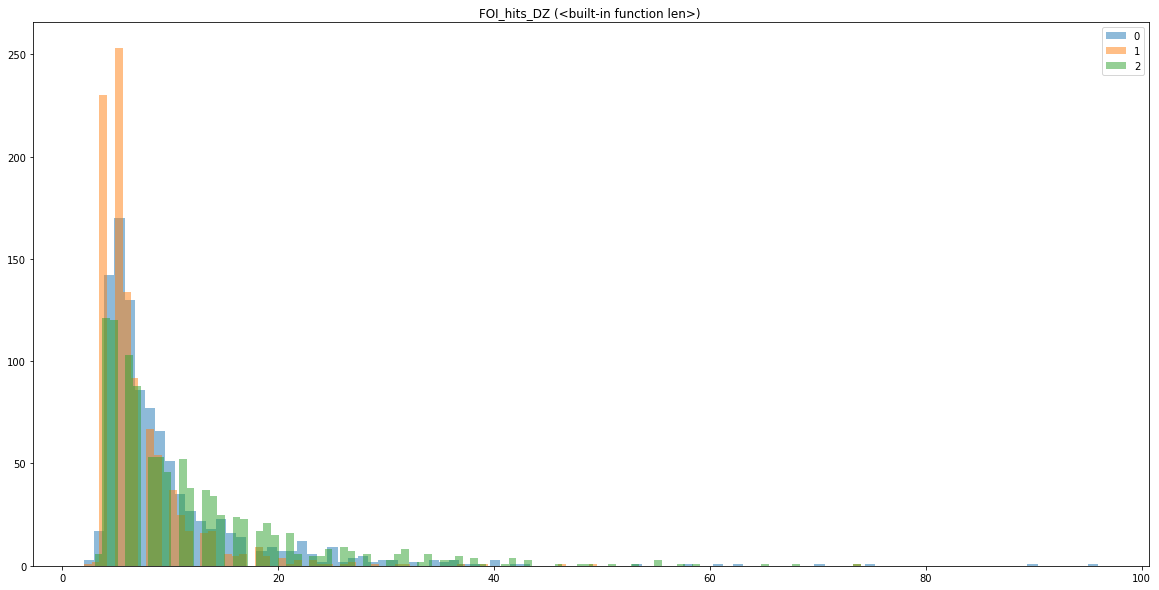

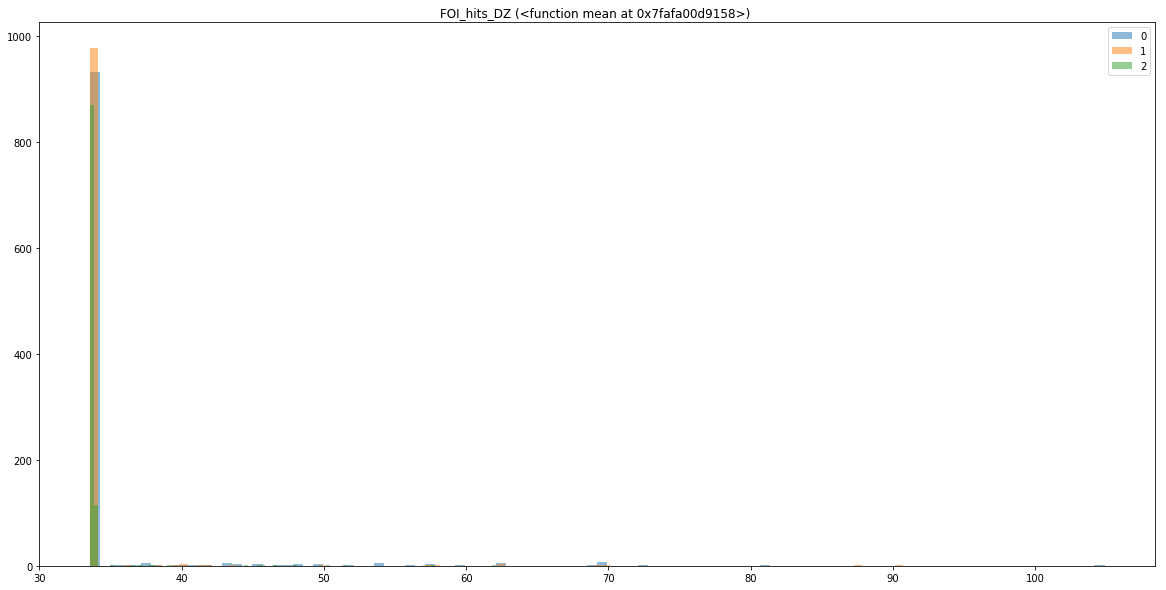

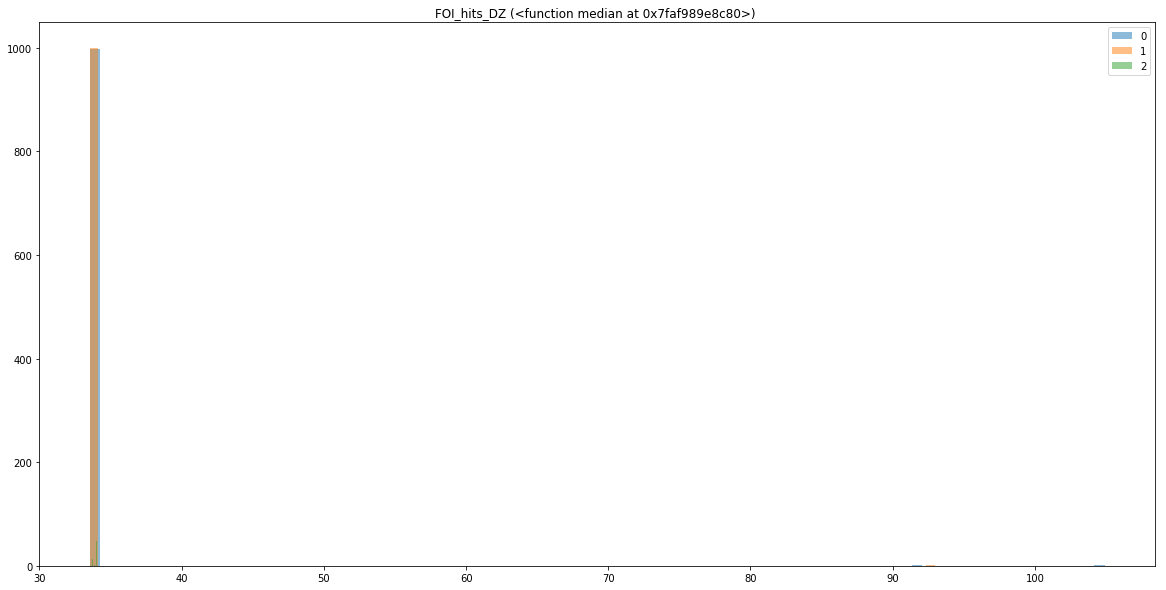

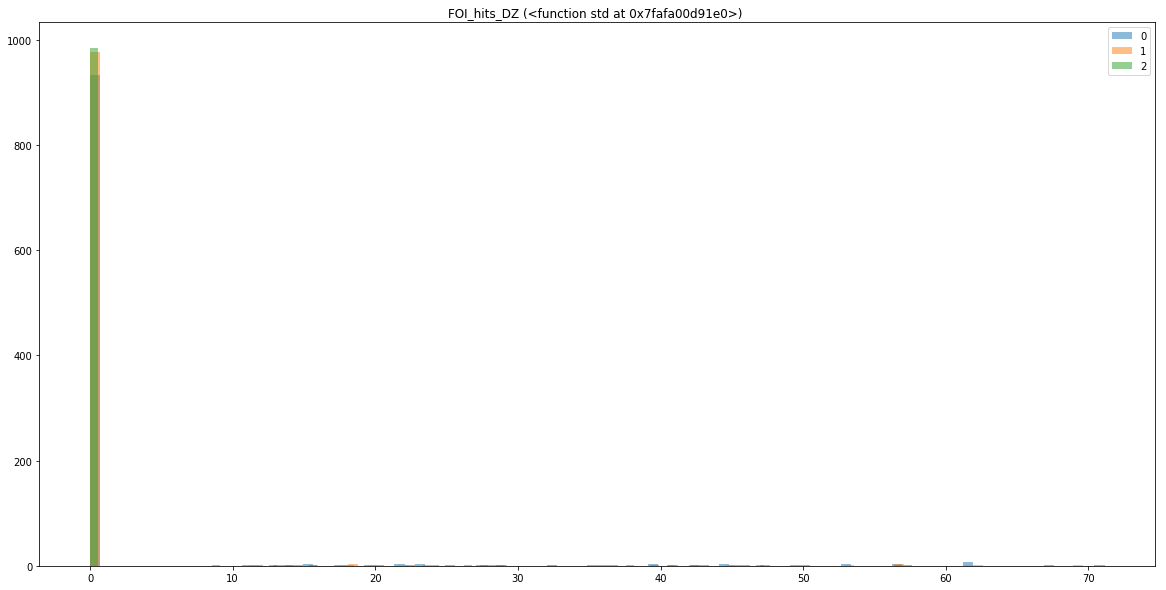

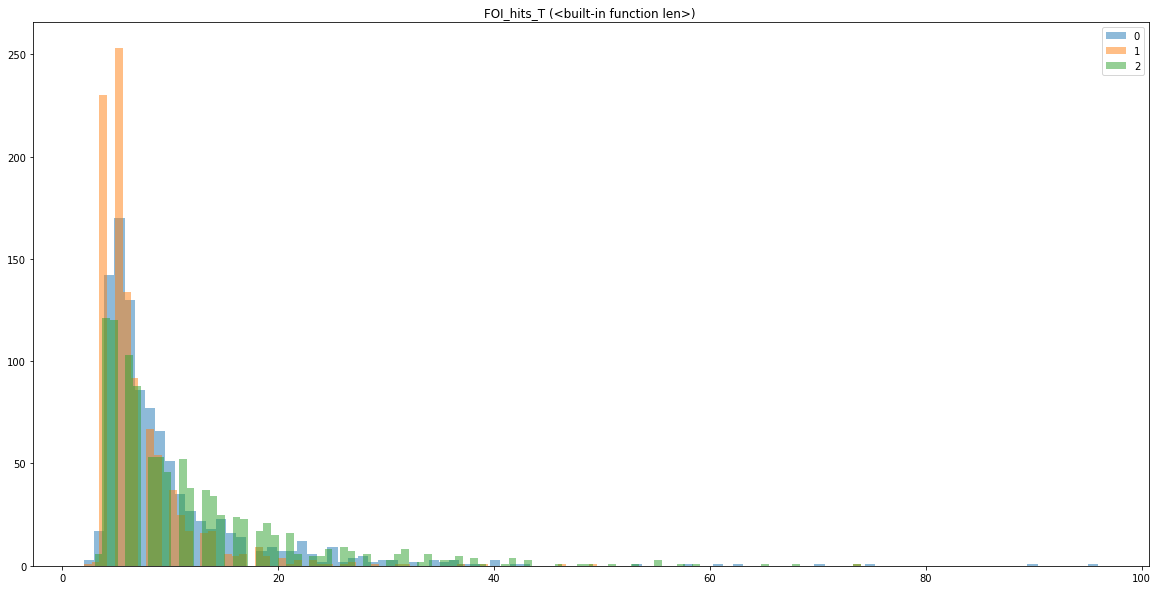

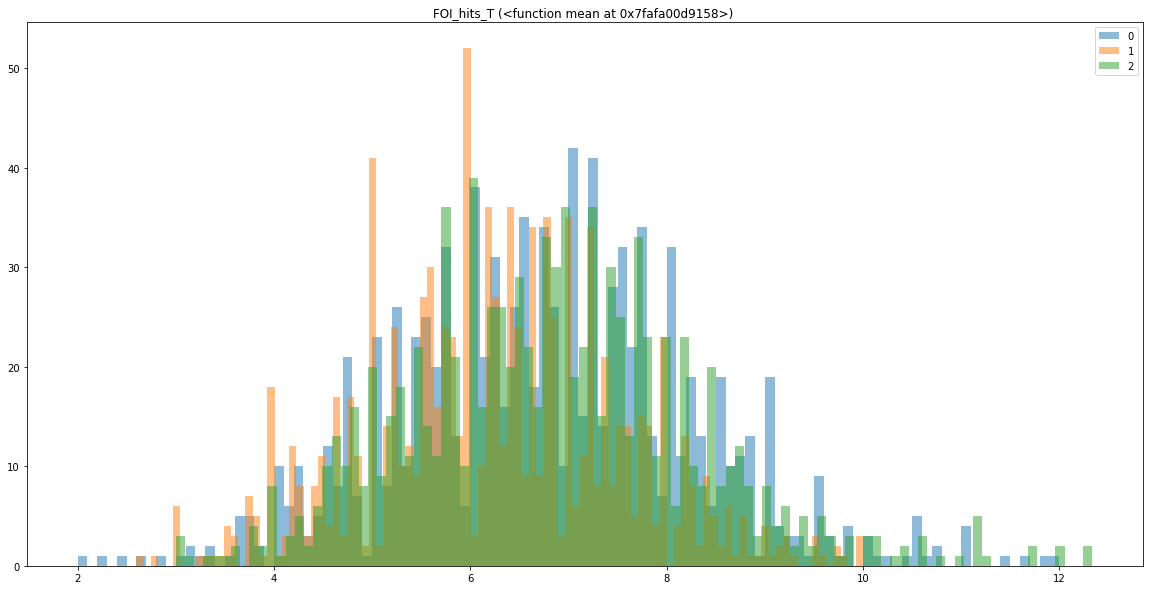

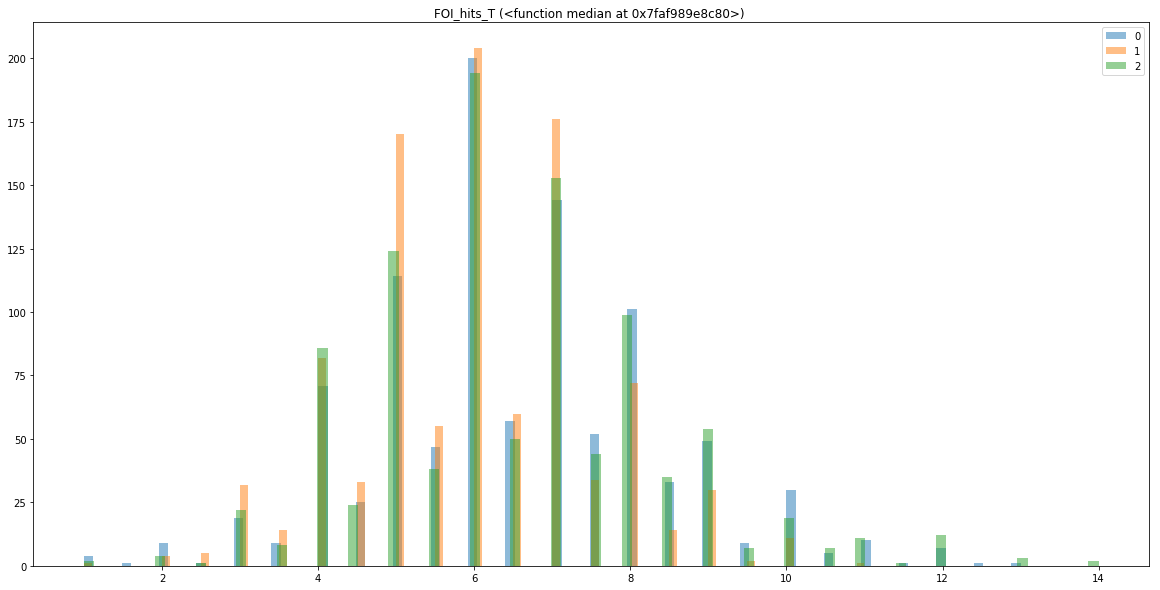

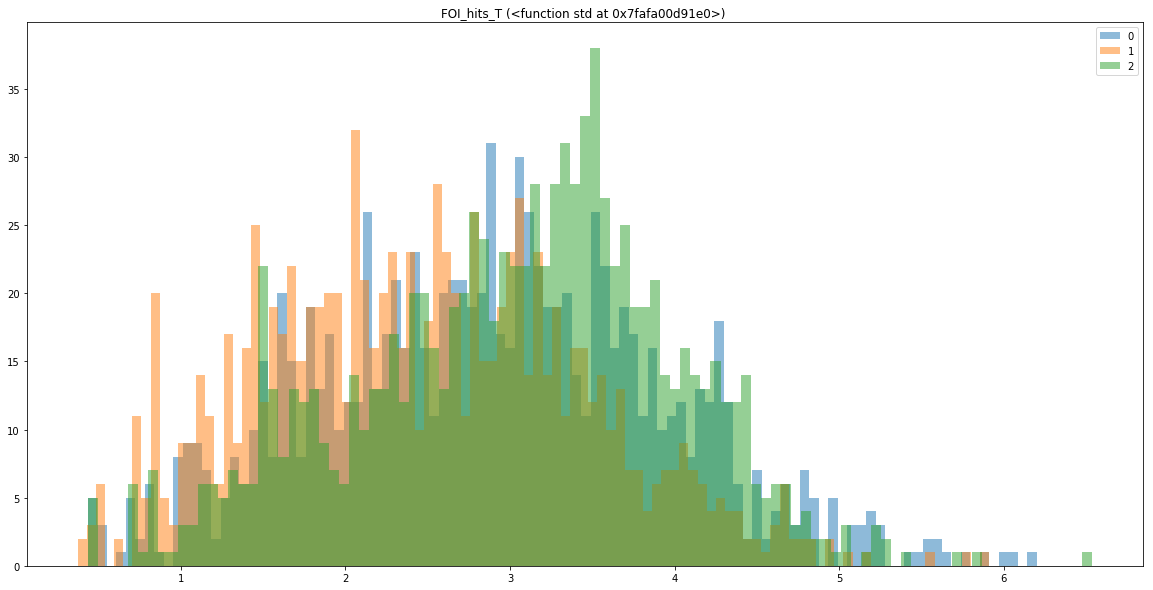

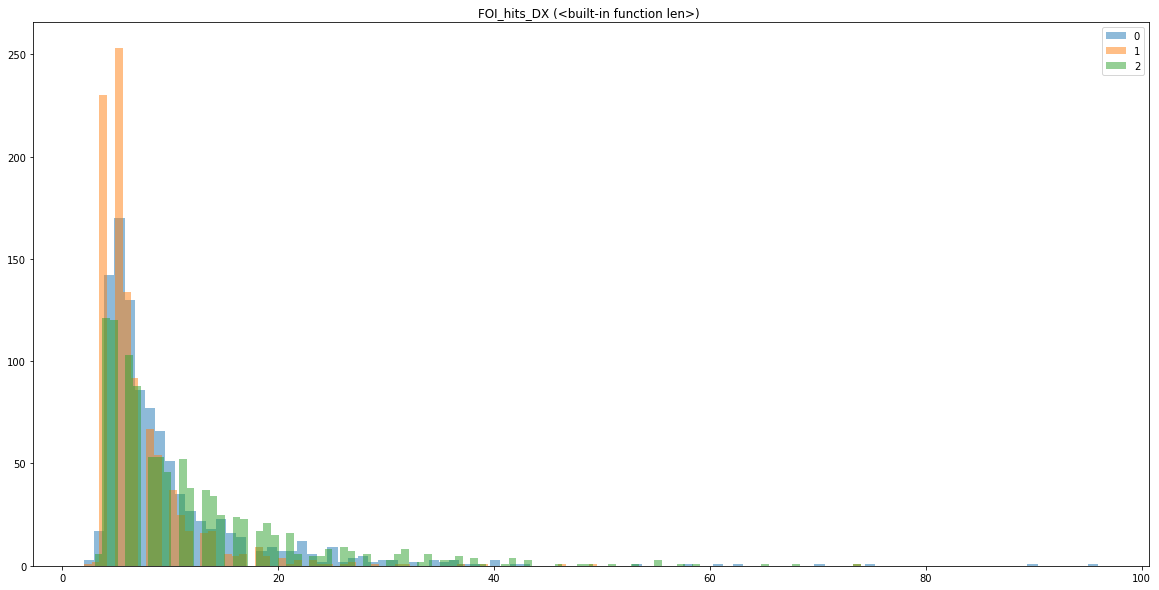

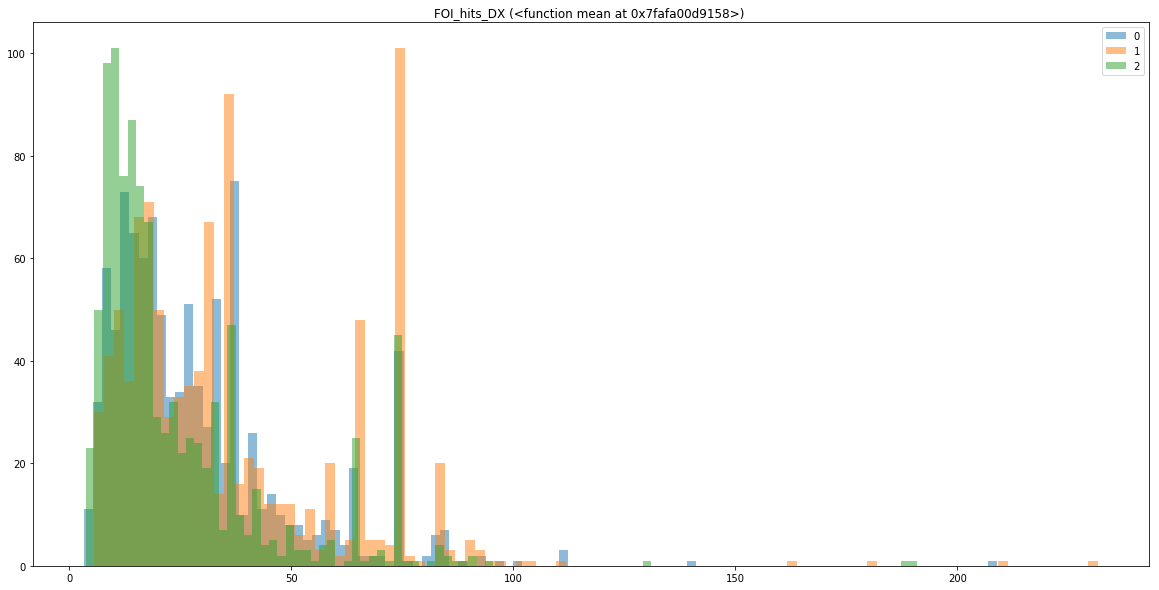

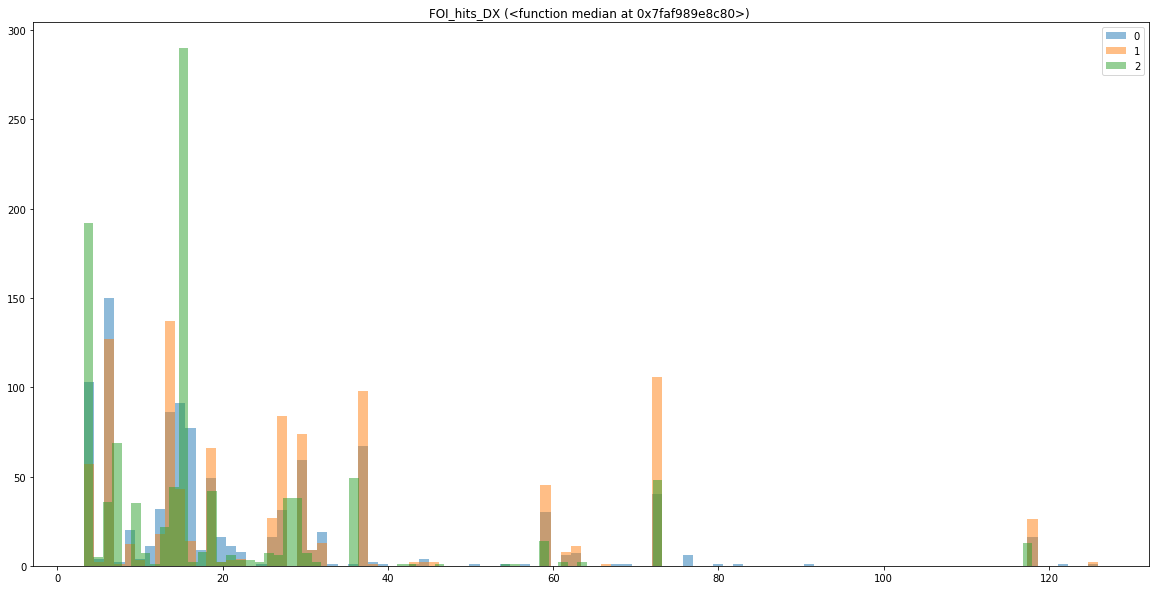

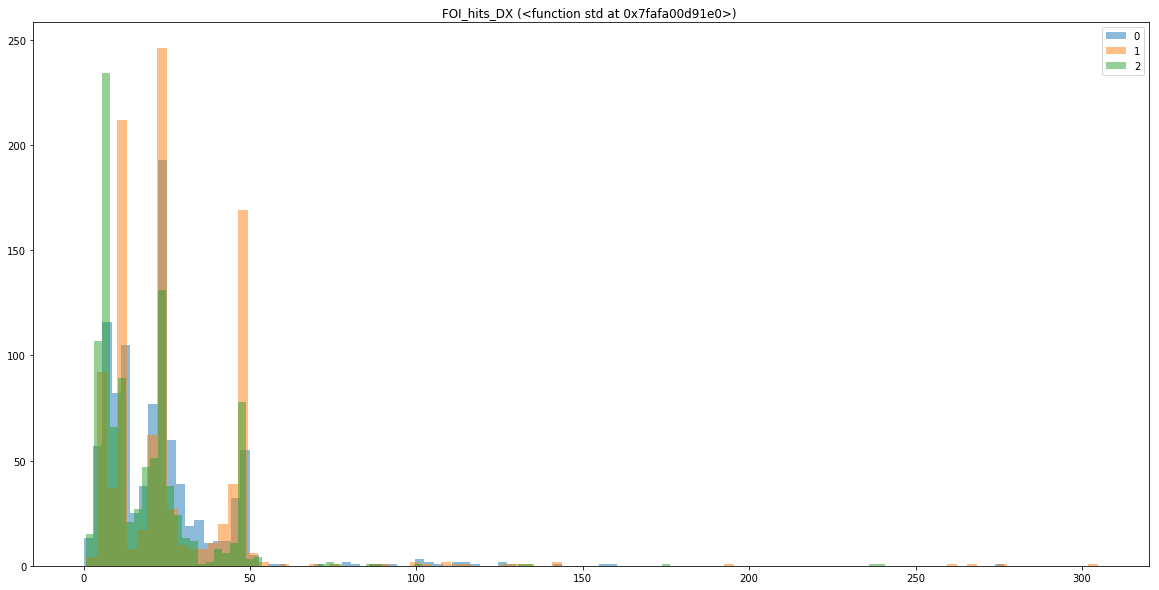

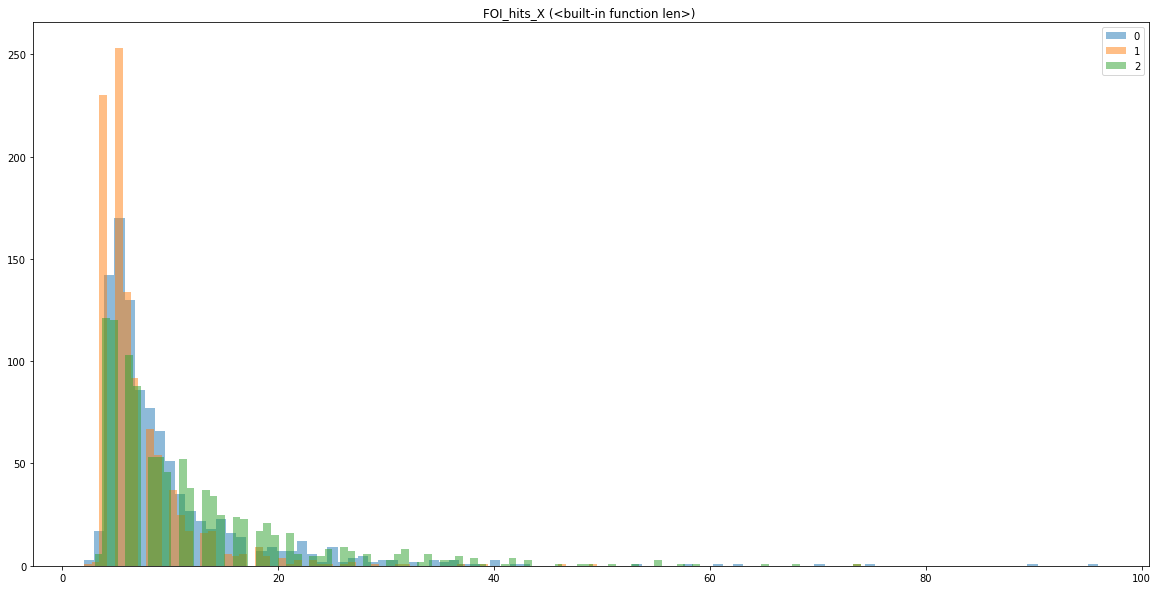

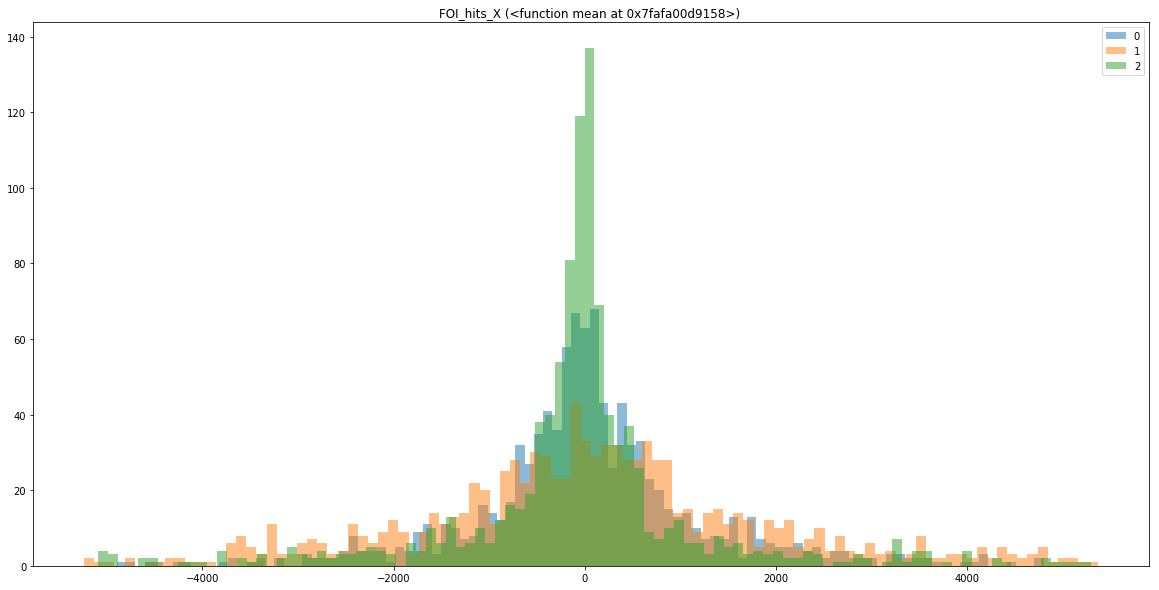

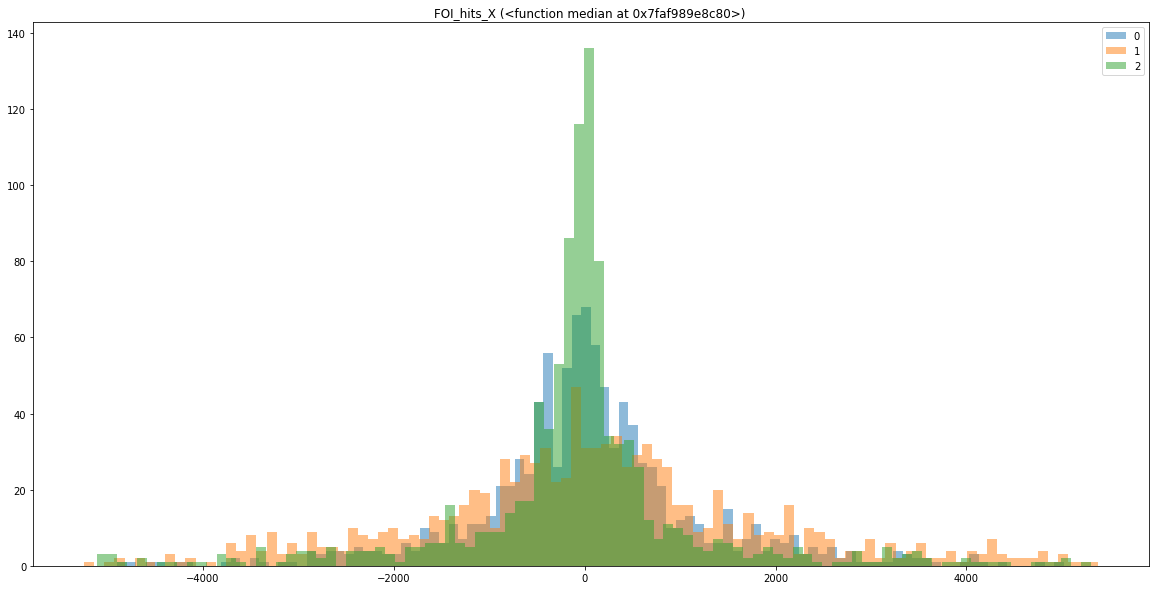

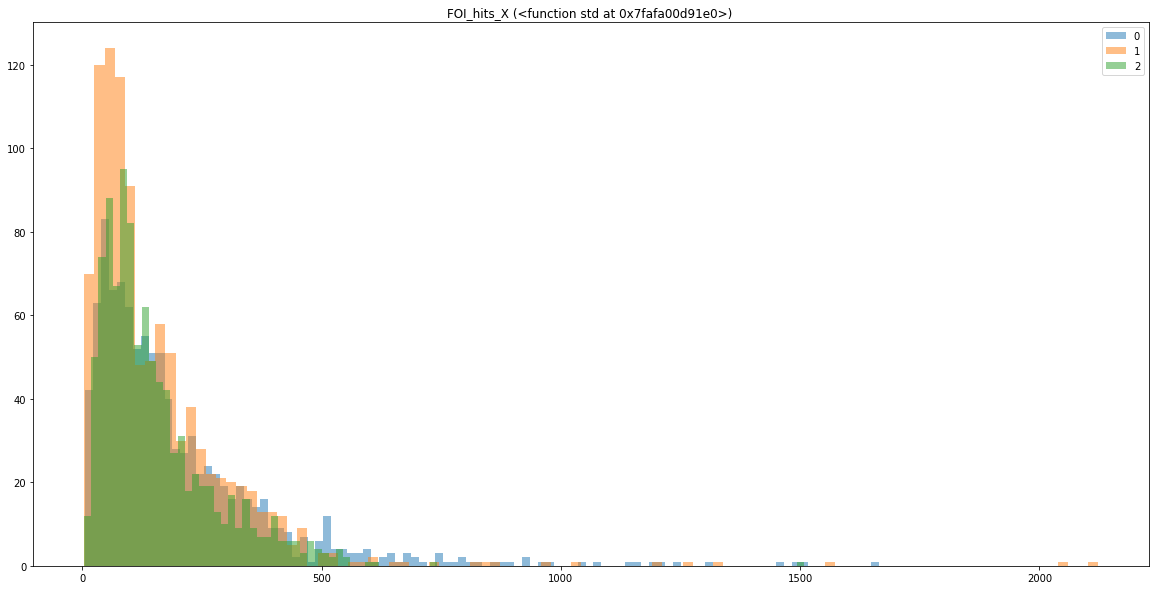

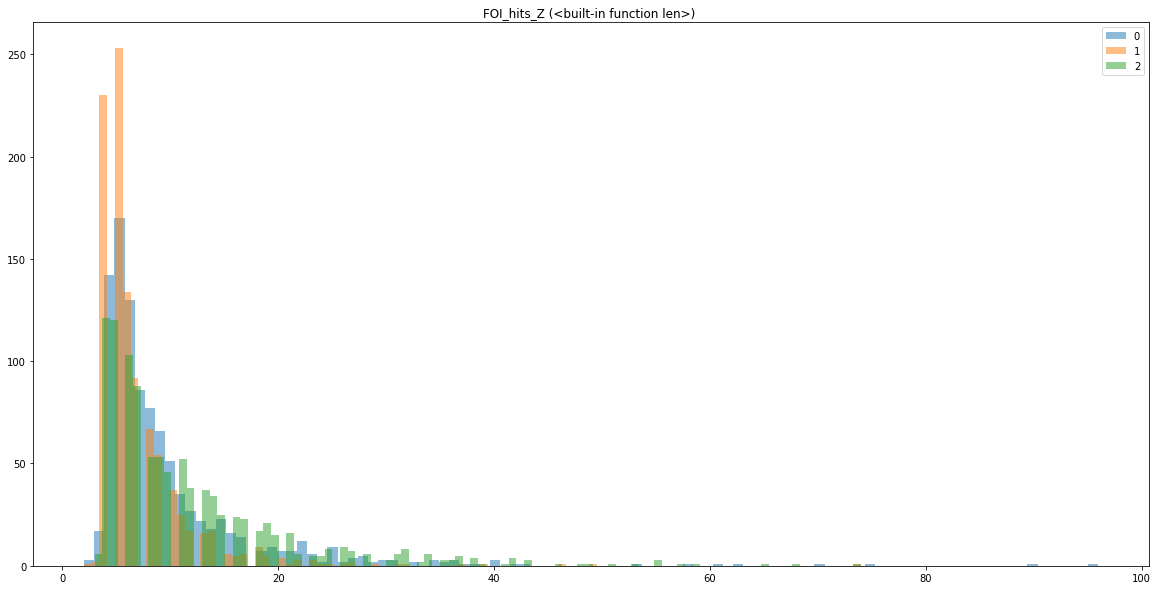

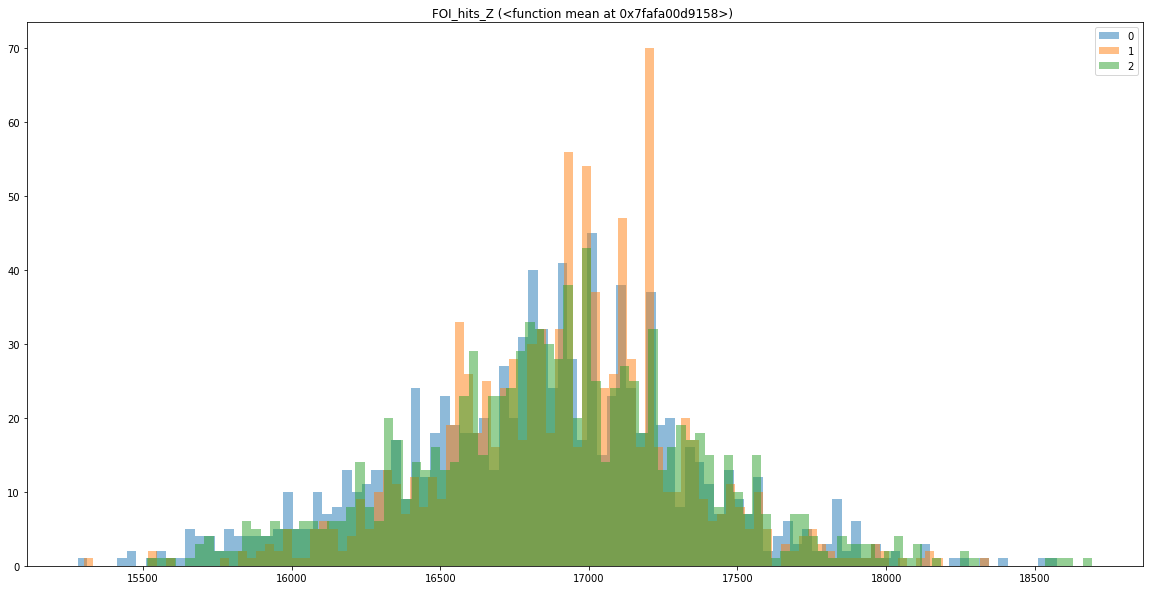

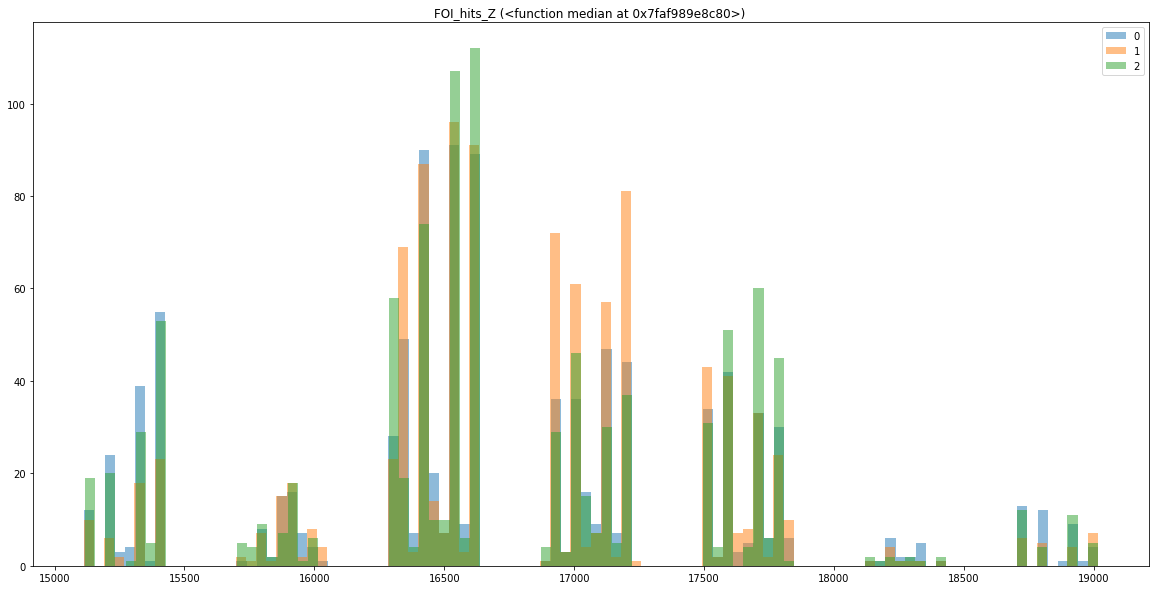

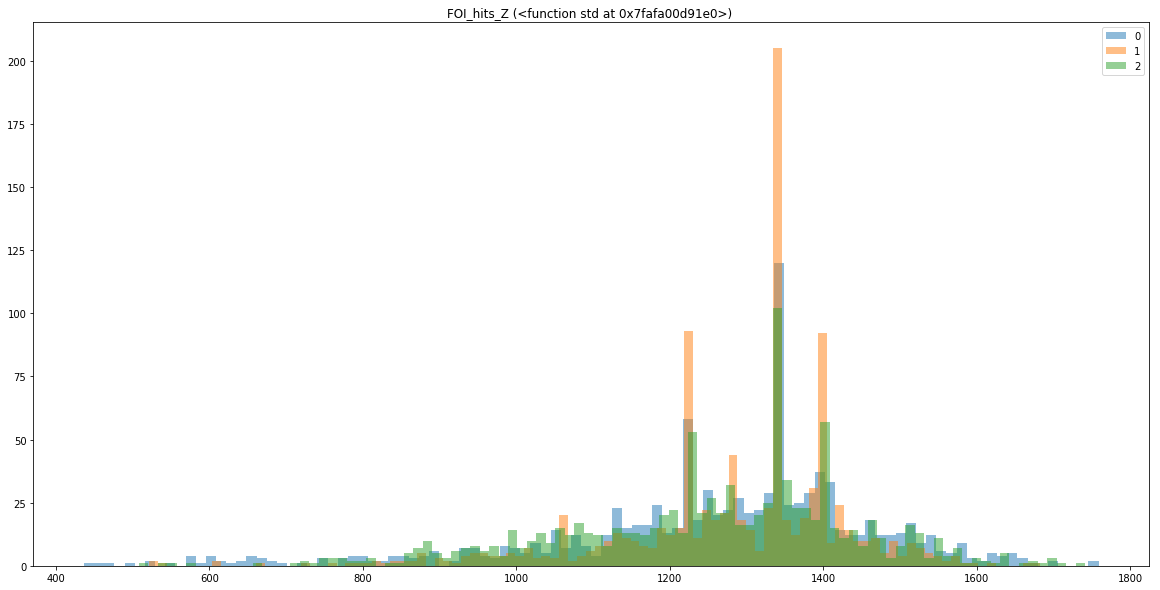

In [149]:
df_dtypes = df[strange_features].dtypes
object_features = [i[0] for i in filter(lambda x: x[1] == 'object', dict(df_dtypes).items())]
for feature in object_features:
    l_0 = [str_to_list(i) for i in df.loc[ind_0, feature].get_values()]
    l_1 = [str_to_list(i) for i in df.loc[ind_1, feature].get_values()]
    l_2 = [str_to_list(i) for i in df.loc[ind_2, feature].get_values()]
    for funct in (len, np.mean, np.median, np.std):
        x_0 = [funct(i) for i in l_0]
        x_1 = [funct(i) for i in l_1]
        x_2 = [funct(i) for i in l_2]
        
        plt.figure(figsize = (20, 10))
        plt.title(feature+' ('+str(funct)+') ')
        plt.hist(x_0, label = '0', bins = 100, alpha = 0.5)
        plt.hist(x_1, label = '1', bins = 100, alpha = 0.5)
        plt.hist(x_2, label = '2', bins = 100, alpha = 0.5)
        plt.legend()
        plt.show()

In [157]:
df.keys()

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

<IPython.core.display.Javascript object>


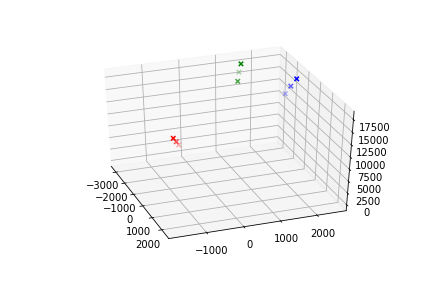

In [166]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

ind_0 = df[df['particle_type'] == 0].index[:1]
ind_1 = df[df['particle_type'] == 1].index[:1]
ind_2 = df[df['particle_type'] == 2].index[:1]

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
n = 100
ax = fig.add_subplot(111, projection='3d')
xs = df.loc[ind_0, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']]
ys = df.loc[ind_0, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']]
zs = df.loc[ind_0, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']]
ax.scatter(xs, ys, zs, c='r', marker='x')

xs = df.loc[ind_1, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']]
ys = df.loc[ind_1, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']]
zs = df.loc[ind_1, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']]
ax.scatter(xs, ys, zs, c='g', marker='x')

xs = df.loc[ind_2, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']]
ys = df.loc[ind_2, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']]
zs = df.loc[ind_2, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']]
ax.scatter(xs, ys, zs, c='b', marker='x')

In [213]:
get_cosine(df)

array([ 3.69590679,  6.48842819,  8.02907747, ...,  0.60807283,
        1.11312442, 11.97255965])

In [216]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction. import 
model_all = Pipeline([('transformer', None),
                      ('model', None)])

class trnsformer()

[('transformer', None), ('model', None)]

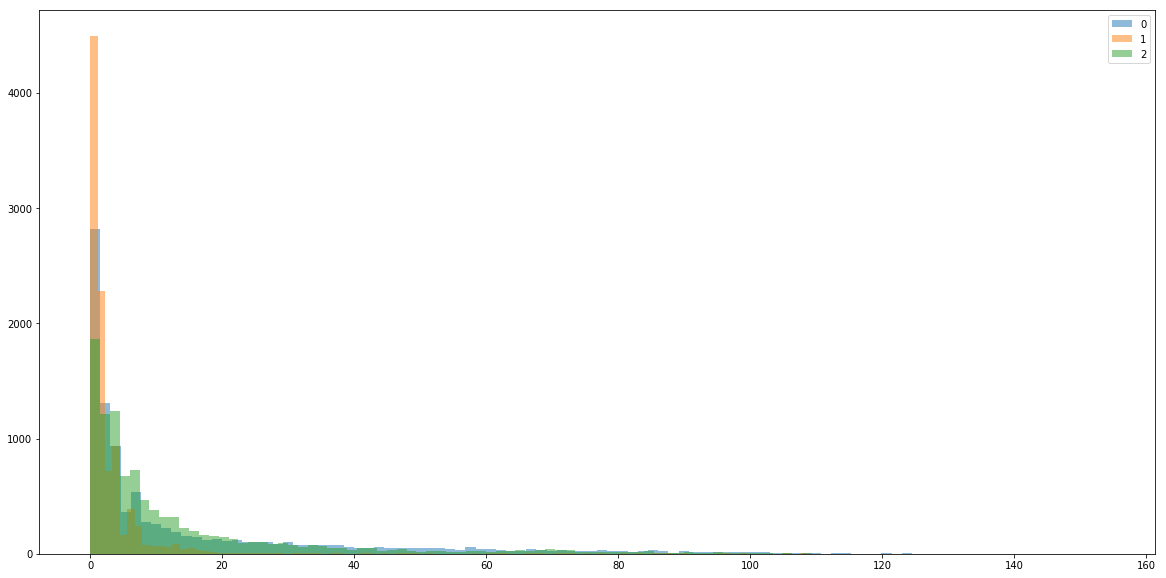

In [212]:
%matplotlib inline
ind_0 = df[df['particle_type'] == 0].index[:10000]
ind_1 = df[df['particle_type'] == 1].index[:10000]
ind_2 = df[df['particle_type'] == 2].index[:10000]

def get_cosine(s):
    x1 = (s['MatchedHit_X[1]'] - s['MatchedHit_X[0]'],\
          s['MatchedHit_Y[1]'] - s['MatchedHit_Y[0]'],\
          s['MatchedHit_Z[1]'] - s['MatchedHit_Z[0]'])
    
    x2 = (s['MatchedHit_X[2]'] - s['MatchedHit_X[1]'],\
          s['MatchedHit_Y[2]'] - s['MatchedHit_Y[1]'],\
          s['MatchedHit_Z[2]'] - s['MatchedHit_Z[1]'])
    
    scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
    scalar11 = np.sum([i**2 for i in x1], axis = 0)
    scalar22 = np.sum([i**2 for i in x2], axis = 0)

    return np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi

plt.figure(figsize = (20, 10))
for ind, lbl in zip([ind_0, ind_1, ind_2], ['0','1','2']):
    df_small = df.loc[ind, :]
    temp = get_cosine(df_small)
    plt.hist(temp, bins = 100, label=lbl, alpha = 0.5)
plt.legend()
plt.show()

In [193]:
temp

89.99999999656039

In [142]:
df['FOI_hits_X'][0]

'[-2685.08 -2583.08 -2954.3  -3376.97 -3140.97 -3609.17]'

In [96]:
import re
reg = re.compile('[\d\-]+')
list(reg.findall('[  2 -14   5   8  -3   0   3   0   0]'))

['2', '-14', '5', '8', '-3', '0', '3', '0', '0']

100%|██████████| 5445705/5445705 [00:28<00:00, 193962.43it/s]


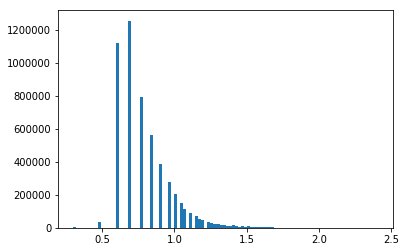

In [112]:
import re
from tqdm import tqdm
reg = re.compile('[\d\-\.]+')
def str_to_list(s):
    try:
        return [float(i) for i in reg.findall(s)]
    except:
        print(s)
        print(1/0)


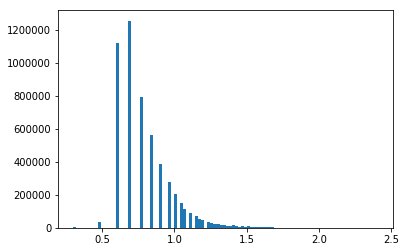

In [104]:
plt.hist([np.log10(len(i)) for i in lst], bins = 100)
plt.show()

In [148]:
x_list = df['MatchedHit_X[0]']
y_list = df['MatchedHit_Y[0]']
z_list = df['MatchedHit_Z[0]']

0          15123.045
1          15212.598
2          15317.953
3          15201.410
4          15205.489
5          15203.224
6          15410.896
7          15118.082
8          15116.167
9          15327.156
10         15203.508
11         15321.262
12         15121.741
13         15119.314
14         15412.798
15         15319.969
16         15203.654
17         15321.566
18         15267.039
19         15399.723
20         15202.037
21         15321.718
22         15203.541
23         15332.404
24         15394.378
25         15321.262
26         15200.169
27         15403.896
28         15325.331
29         15117.399
             ...    
5445675    15321.262
5445676    15114.037
5445677    15119.485
5445678    15409.288
5445679    15319.722
5445680    15321.604
5445681    15316.014
5445682    15321.034
5445683    15128.448
5445684    15319.627
5445685    15325.331
5445686    15269.687
5445687    15313.848
5445688    15119.328
5445689    15205.011
5445690    15108.633
5445691    15

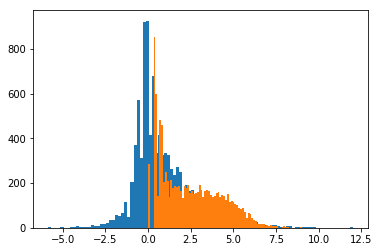

In [111]:
plt.hist([np.mean(i) for i in lst[:10000]], bins = 100)
plt.hist([np.std(i) for i in lst[:10000]], bins = 100)
plt.show()


In [43]:
k_list = []

for n in range(10):
    x_list = [df[df['label']==1].loc[n, 'Lextra_X[%d]'%i] for i in range(3)]
    y_list = [df[df['label']==1].loc[n, 'Lextra_Y[%d]'%i] for i in range(3)]
    k = (x_list[0]-x_list[1])/(y_list[0]-y_list[1])
    k_list.append(np.arctan(k)*180/np.pi)
plt.hist(k_list, bins = 100, label = 1, alpha = 0.5)


k_list = []
for n in range(10):
    x_list = [df[df['label']==0].loc[n, 'Lextra_X[%d]'%i] for i in range(3)]
    y_list = [df[df['label']==0].loc[n, 'Lextra_Y[%d]'%i] for i in range(3)]
    k = (x_list[0]-x_list[1])/(y_list[0]-y_list[1])
    k_list.append(np.arctan(k)*180/np.pi)
    
plt.hist(k_list, bins = 100, label = 0, alpha = 0.5)

plt.legend()
plt.show()
# plt.scatter(x_list, y_list)
# z_list = [df.loc[n, 'Lextra_Z[%d]'%i] for i in range(2)]

MemoryError: 

In [7]:
df.dtypes.value_counts()

float64    49
int64      22
object      9
dtype: int64

Напишем самую простую линейную модель на 22+49 фичах, посмотрим на скорость обучения

In [8]:
simple_features = list(dict(filter(lambda x:str(x[1]) != "object", dict(df.dtypes).items())).keys())

In [9]:
print(', '.join(simple_features))

id, ncl[0], ncl[1], ncl[2], ncl[3], avg_cs[0], avg_cs[1], avg_cs[2], avg_cs[3], ndof, MatchedHit_TYPE[0], MatchedHit_TYPE[1], MatchedHit_TYPE[2], MatchedHit_TYPE[3], MatchedHit_X[0], MatchedHit_X[1], MatchedHit_X[2], MatchedHit_X[3], MatchedHit_Y[0], MatchedHit_Y[1], MatchedHit_Y[2], MatchedHit_Y[3], MatchedHit_Z[0], MatchedHit_Z[1], MatchedHit_Z[2], MatchedHit_Z[3], MatchedHit_DX[0], MatchedHit_DX[1], MatchedHit_DX[2], MatchedHit_DX[3], MatchedHit_DY[0], MatchedHit_DY[1], MatchedHit_DY[2], MatchedHit_DY[3], MatchedHit_DZ[0], MatchedHit_DZ[1], MatchedHit_DZ[2], MatchedHit_DZ[3], MatchedHit_T[0], MatchedHit_T[1], MatchedHit_T[2], MatchedHit_T[3], MatchedHit_DT[0], MatchedHit_DT[1], MatchedHit_DT[2], MatchedHit_DT[3], Lextra_X[0], Lextra_X[1], Lextra_X[2], Lextra_X[3], Lextra_Y[0], Lextra_Y[1], Lextra_Y[2], Lextra_Y[3], NShared, Mextra_DX2[0], Mextra_DX2[1], Mextra_DX2[2], Mextra_DX2[3], Mextra_DY2[0], Mextra_DY2[1], Mextra_DY2[2], Mextra_DY2[3], FOI_hits_N, PT, P, sWeight, particle_type

In [17]:
simple_features.remove('id')
simple_features.remove('label')
simple_features.remove('particle_type')

ValueError: list.remove(x): x not in list

In [ ]:
%%time
df = df.replace(-9999, np.nan)

In [ ]:
df.isnull().sum()

In [ ]:
%%time
df = df.fillna(df.median())

In [ ]:
import pickle
pickle.dump(df, open('./data/df.pickle', 'wb'))

In [ ]:
# df[:1000].copy().mean()

In [ ]:
%%time
X = df[simple_features]
y = df['label']

In [ ]:
# dict(model.feature_importances_)

In [98]:
features_imp_dict = {k: v for k,v in zip(X_train.keys(), model.feature_importances_)}
for key, val in sorted(features_imp_dict.items(), key = lambda x: -x[1]):
    print(key, val)

particle_type 0.6770833
kinWeight 0.30555555
MatchedHit_TYPE[1] 0.010416667
MatchedHit_DT[0] 0.0034722222
PT 0.0034722222
ncl[0] 0.0
ncl[1] 0.0
ncl[2] 0.0
ncl[3] 0.0
avg_cs[0] 0.0
avg_cs[1] 0.0
avg_cs[2] 0.0
avg_cs[3] 0.0
ndof 0.0
MatchedHit_TYPE[0] 0.0
MatchedHit_TYPE[2] 0.0
MatchedHit_TYPE[3] 0.0
MatchedHit_X[0] 0.0
MatchedHit_X[1] 0.0
MatchedHit_X[2] 0.0
MatchedHit_X[3] 0.0
MatchedHit_Y[0] 0.0
MatchedHit_Y[1] 0.0
MatchedHit_Y[2] 0.0
MatchedHit_Y[3] 0.0
MatchedHit_Z[0] 0.0
MatchedHit_Z[1] 0.0
MatchedHit_Z[2] 0.0
MatchedHit_Z[3] 0.0
MatchedHit_DX[0] 0.0
MatchedHit_DX[1] 0.0
MatchedHit_DX[2] 0.0
MatchedHit_DX[3] 0.0
MatchedHit_DY[0] 0.0
MatchedHit_DY[1] 0.0
MatchedHit_DY[2] 0.0
MatchedHit_DY[3] 0.0
MatchedHit_DZ[0] 0.0
MatchedHit_DZ[1] 0.0
MatchedHit_DZ[2] 0.0
MatchedHit_DZ[3] 0.0
MatchedHit_T[0] 0.0
MatchedHit_T[1] 0.0
MatchedHit_T[2] 0.0
MatchedHit_T[3] 0.0
MatchedHit_DT[1] 0.0
MatchedHit_DT[2] 0.0
MatchedHit_DT[3] 0.0
Lextra_X[0] 0.0
Lextra_X[1] 0.0
Lextra_X[2] 0.0
Lextra_X[3] 0.0
L

In [ ]:
plt.scatter(df['particle_type'][:1000], df['label'][:1000])
plt.show()

In [88]:
# X.replace(9999, np.median(X))

In [89]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 4.4 s, sys: 808 ms, total: 5.21 s
Wall time: 5.2 s


In [90]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, classification_report

In [91]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [92]:
%%time
from sklearn.linear_model import LogisticRegression
model = XGBClassifier(verbose = 1, n_jobs = 16)
model.fit(X_train[::10].get_values(), y_train[::10].get_values())

y_pred_test  = model.predict(X_test.get_values())
y_pred_train = model.predict(X_train.get_values())

p_pred_test  = model.predict_proba(X_test.get_values())
p_pred_train = model.predict_proba(X_train.get_values())

print('train')
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

print('test')
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


train
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    282502
          1       1.00      1.00      1.00   3366120

avg / total       1.00      1.00      1.00   3648622

[[ 282502       0]
 [      0 3366120]]
test
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    138716
          1       1.00      1.00      1.00   1658367

avg / total       1.00      1.00      1.00   1797083

[[ 138716       0]
 [      0 1658367]]
CPU times: user 3min 4s, sys: 8.39 s, total: 3min 13s
Wall time: 24.1 s


In [68]:
y_pred_test  = model.predict(X_test)
y_pred_train = model.predict(X_train)

p_pred_test  = model.predict_proba(X_test)
p_pred_train = model.predict_proba(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [69]:
print('train')
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

print('test')
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

train
             precision    recall  f1-score   support

          0       0.95      0.67      0.79    282502
          1       0.97      1.00      0.98   3366120

avg / total       0.97      0.97      0.97   3648622

[[ 189776   92726]
 [   9629 3356491]]
test
             precision    recall  f1-score   support

          0       0.95      0.67      0.79    138716
          1       0.97      1.00      0.99   1658367

avg / total       0.97      0.97      0.97   1797083

[[  93148   45568]
 [   4755 1653612]]


In [66]:
print('train')
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

print('test')
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

train
             precision    recall  f1-score   support

          0       0.93      0.37      0.53    282502
          1       0.95      1.00      0.97   3366120

avg / total       0.95      0.95      0.94   3648622

[[ 103883  178619]
 [   7419 3358701]]
test
             precision    recall  f1-score   support

          0       0.93      0.37      0.53    138716
          1       0.95      1.00      0.97   1658367

avg / total       0.95      0.95      0.94   1797083

[[  51072   87644]
 [   3623 1654744]]


In [61]:
print(confusion_matrix(y_test, y_pred_test))

[[  51072   87644]
 [   3623 1654744]]


In [62]:
print(confusion_matrix(y_train, y_pred_train))

[[ 103883  178619]
 [   7419 3358701]]


In [ ]:
from sklearn.metrics import

In [63]:
from sklearn.metrics import roc_auc_score, average_precision_score